In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Nucleation_Dynamics as nd
from extensisq import BS5, SSV2stab, Pr9, CK5, CFMR7osc
import scienceplots

In [2]:
plt.style.use(['science', 'ieee'])

In [3]:
# Chromium 

# Ejemplo de uso de la clase
params = {
    'temperature': 668,
    'activation_energy': 52920.2,
    'diffusivity_factor': 2e-9,
    'jump_distance': 4.6e-10,
    'molar_mass': 51.9961,
    'mass_density': 7.19,
    'melting_point': 2130,
    'heat_fusion': 20.48 * 1e3,
    'supersaturation_ratio': 1.1,
    'sigma': 0.5, 
    'method': 'melting'
}

cluster_physics = nd.ClusterPhysics(params)

print(f"Critical radius: {cluster_physics.critical_radius}")
print(f"Critical Gibbs free energy: {cluster_physics.critical_energy_barrier}")
print(f"Critical number of atoms: {cluster_physics.critical_number_of_molecules}")


Critical radius: 5.144511690470715e-10 meter
Critical Gibbs free energy: 5.543026189706741e-19 joule
Critical number of atoms: 47.49305616509702 dimensionless


In [3]:
# Ejemplo de uso de la clase
params = {
    'temperature': 750,
    'activation_energy': 59920.2,
    'diffusivity_factor': 2e-9,
    'jump_distance': 4.6e-10,
    'molar_mass': 150.05,
    'mass_density': 2.5,
    'melting_point': 1300,
    'heat_fusion': 52 * 1e3,
    'supersaturation_ratio': 20.5,
    'sigma': 0.15, 
    'method': 'melting'
}

cluster_physics = nd.ClusterPhysics(params)

print(f"Critical radius: {cluster_physics.critical_radius}")
print(f"Critical Gibbs free energy: {cluster_physics.critical_energy_barrier}")
print(f"Critical number of atoms: {cluster_physics.critical_number_of_molecules}")


Critical radius: 8.184545454545456e-10 meter
Critical Gibbs free energy: 4.2089037887339014e-19 joule
Critical number of atoms: 23.042374227544897 dimensionless


In [4]:
cluster_physics.critical_number_of_molecules

23.042374227544897 <Unit('dimensionless')>

In [4]:
MAX_NUMBER_MOLECULES = 40
number_clusters_start = 2
dt = 1e-8/cluster_physics.unbiased_jump_rate.magnitude
dt = dt*1e6

In [5]:
#time_step_array = [int(1e5), int(2e5), int(3e5), int(4e5), int(5e5)]
time_step_array = [int(1e6)]

x_array = []
y_array = []
for ts in time_step_array:
    sim = nd.ClusterDynamics(params,ts,dt, number_clusters_start, MAX_NUMBER_MOLECULES, record_frequency=10)
    sim.simulate()
    x = sim.number_molecules_array
    y = sim.cluster_array
    x_array.append(x)
    y_array.append(y)

Computation time: 2.9810 seconds


In [7]:
#With Numba 
""" 
# Ejemplo de uso de la clase
params = {
    'temperature': 750,
    'activation_energy': 59920.2,
    'diffusivity_factor': 2e-9,
    'jump_distance': 4.6e-10,
    'molar_mass': 150.05,
    'mass_density': 2.5,
    'melting_point': 1300,
    'heat_fusion': 52 * 1e3,
    'supersaturation_ratio': 20.5,
    'sigma': 0.15, 
    'method': 'melting'
}

Computation time: 1.4030 seconds
Computation time: 0.0169 seconds
Computation time: 0.1812 seconds
Computation time: 0.8422 seconds
 """

 # Without Numba
""" 
Computation time: 0.0014 seconds
Computation time: 0.0812 seconds
Computation time: 0.8159 seconds
Computation time: 4.1370 seconds 
"""

' \nComputation time: 0.0014 seconds\nComputation time: 0.0812 seconds\nComputation time: 0.8159 seconds\nComputation time: 4.1370 seconds \n'

In [6]:
steady_state = sim.compute_analytical_steady_state()

/home/alexandre_sureda/miniconda3/envs/neutronics/lib/python3.11/site-packages/Nucleation_Dynamics/dynamics.py:186: RuntimeWarning: divide by zero encountered in reciprocal
  equilibrium_sum = np.sum((self.forward_rate_array*equilibrium_densities)**-1)
/home/alexandre_sureda/miniconda3/envs/neutronics/lib/python3.11/site-packages/Nucleation_Dynamics/dynamics.py:186: RuntimeWarning: overflow encountered in reciprocal
  equilibrium_sum = np.sum((self.forward_rate_array*equilibrium_densities)**-1)


/tmp/ipykernel_20030/183899184.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(x_array[i],np.log(sim.cluster_evolution[:,-1]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))
/tmp/ipykernel_20030/183899184.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_array[i],np.log(sim.cluster_evolution[:,1]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))


(1.0, 40.0)

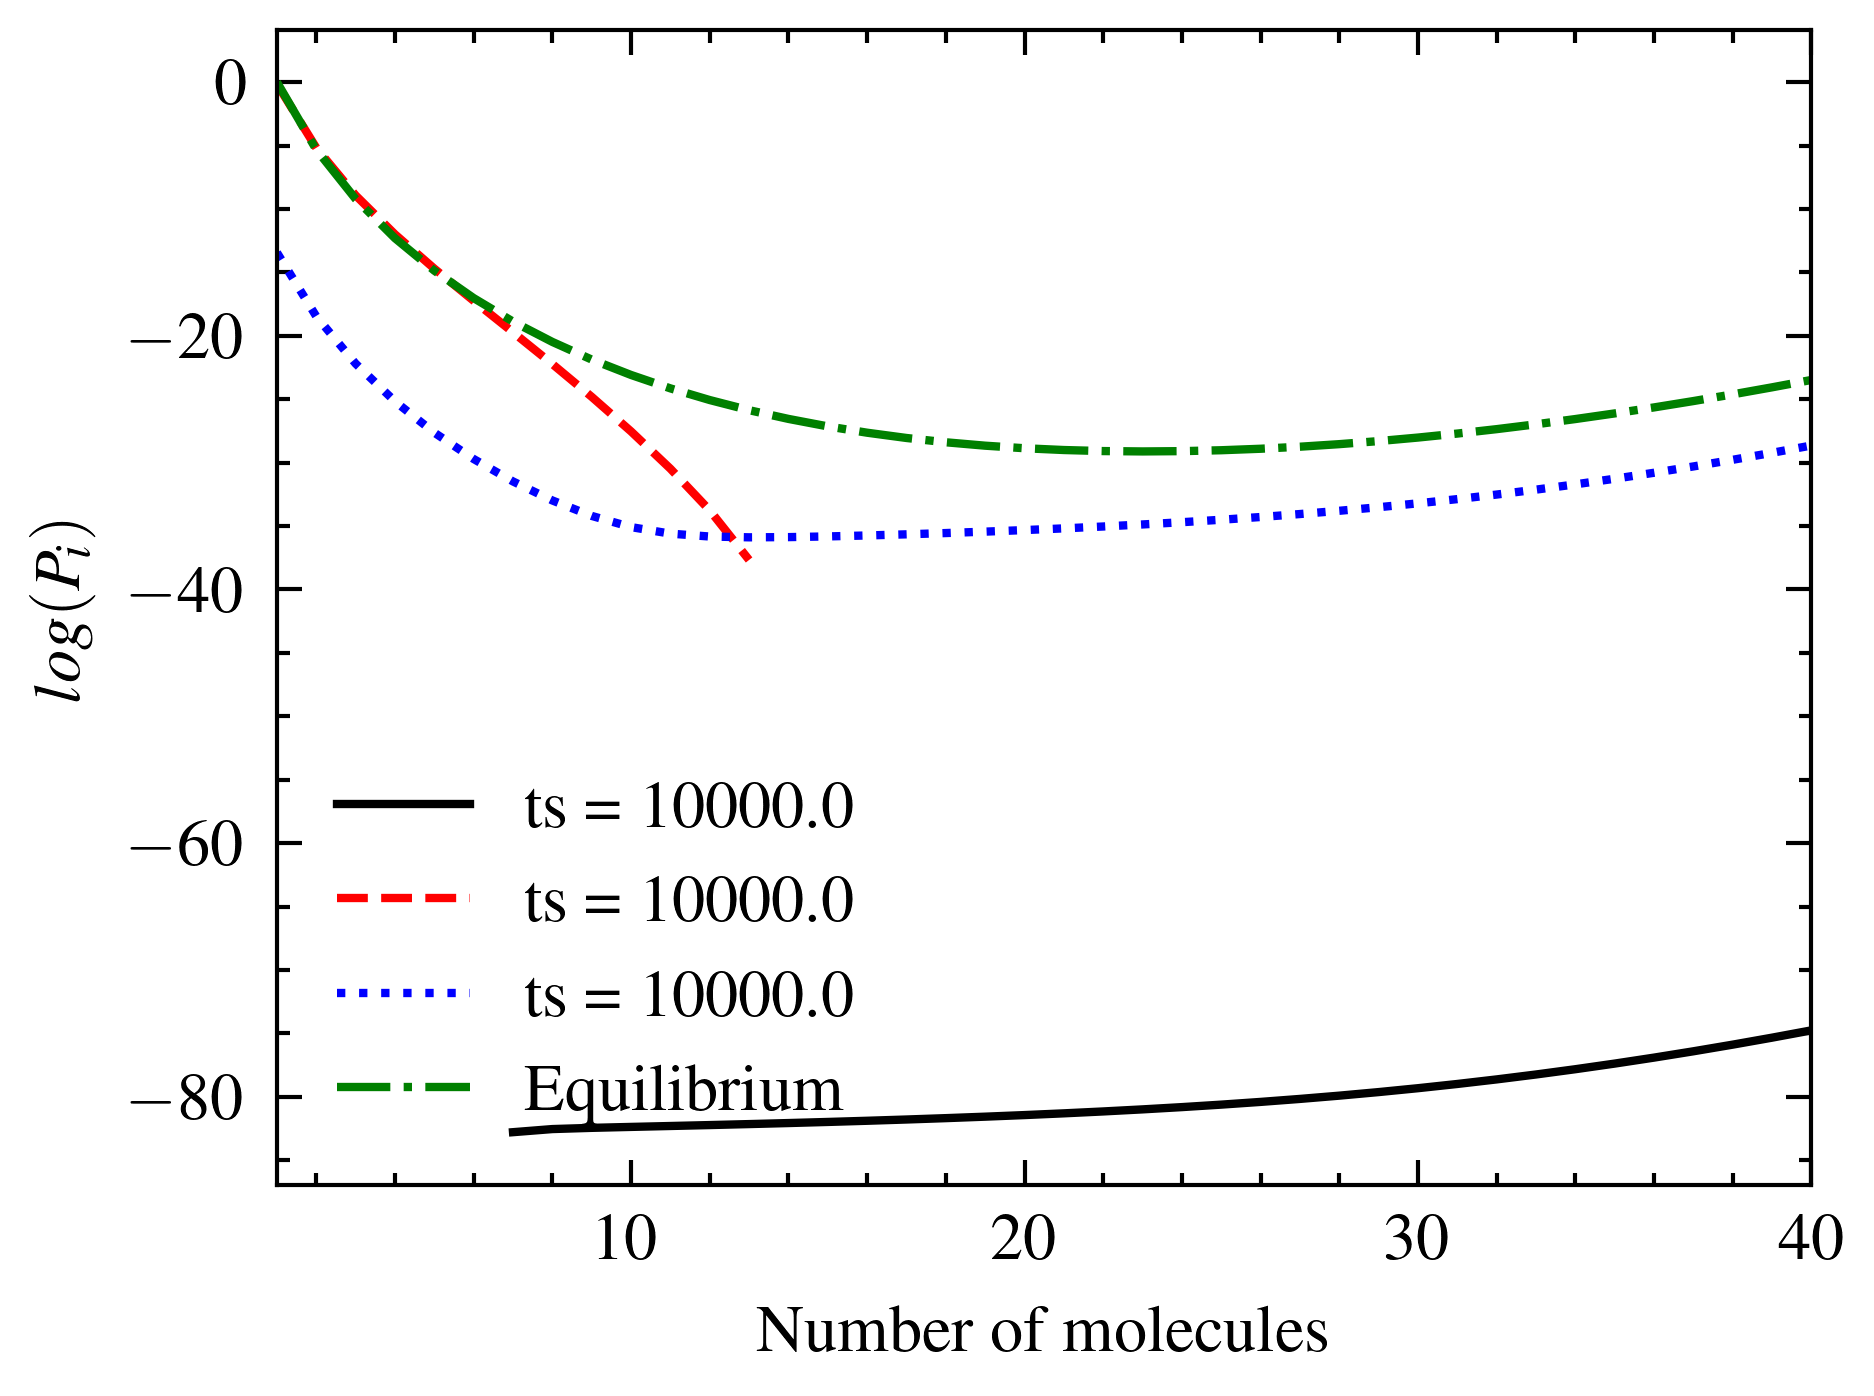

In [6]:
plt.figure()
n = np.linspace(1,40,40)
for i in range(len(time_step_array)):
    plt.plot(x_array[i],np.log(sim.cluster_evolution[:,-1]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))
    plt.plot(x_array[i],np.log(sim.cluster_evolution[:,1]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))
    plt.plot(x_array[i],np.log(sim.cluster_evolution[:,100]/cluster_physics.AVOGADRO.magnitude), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))

plt.plot(n,np.log(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel(r'$log(P_i)$')
plt.xlim(1,MAX_NUMBER_MOLECULES)
#plt.ylim(-50,-20)


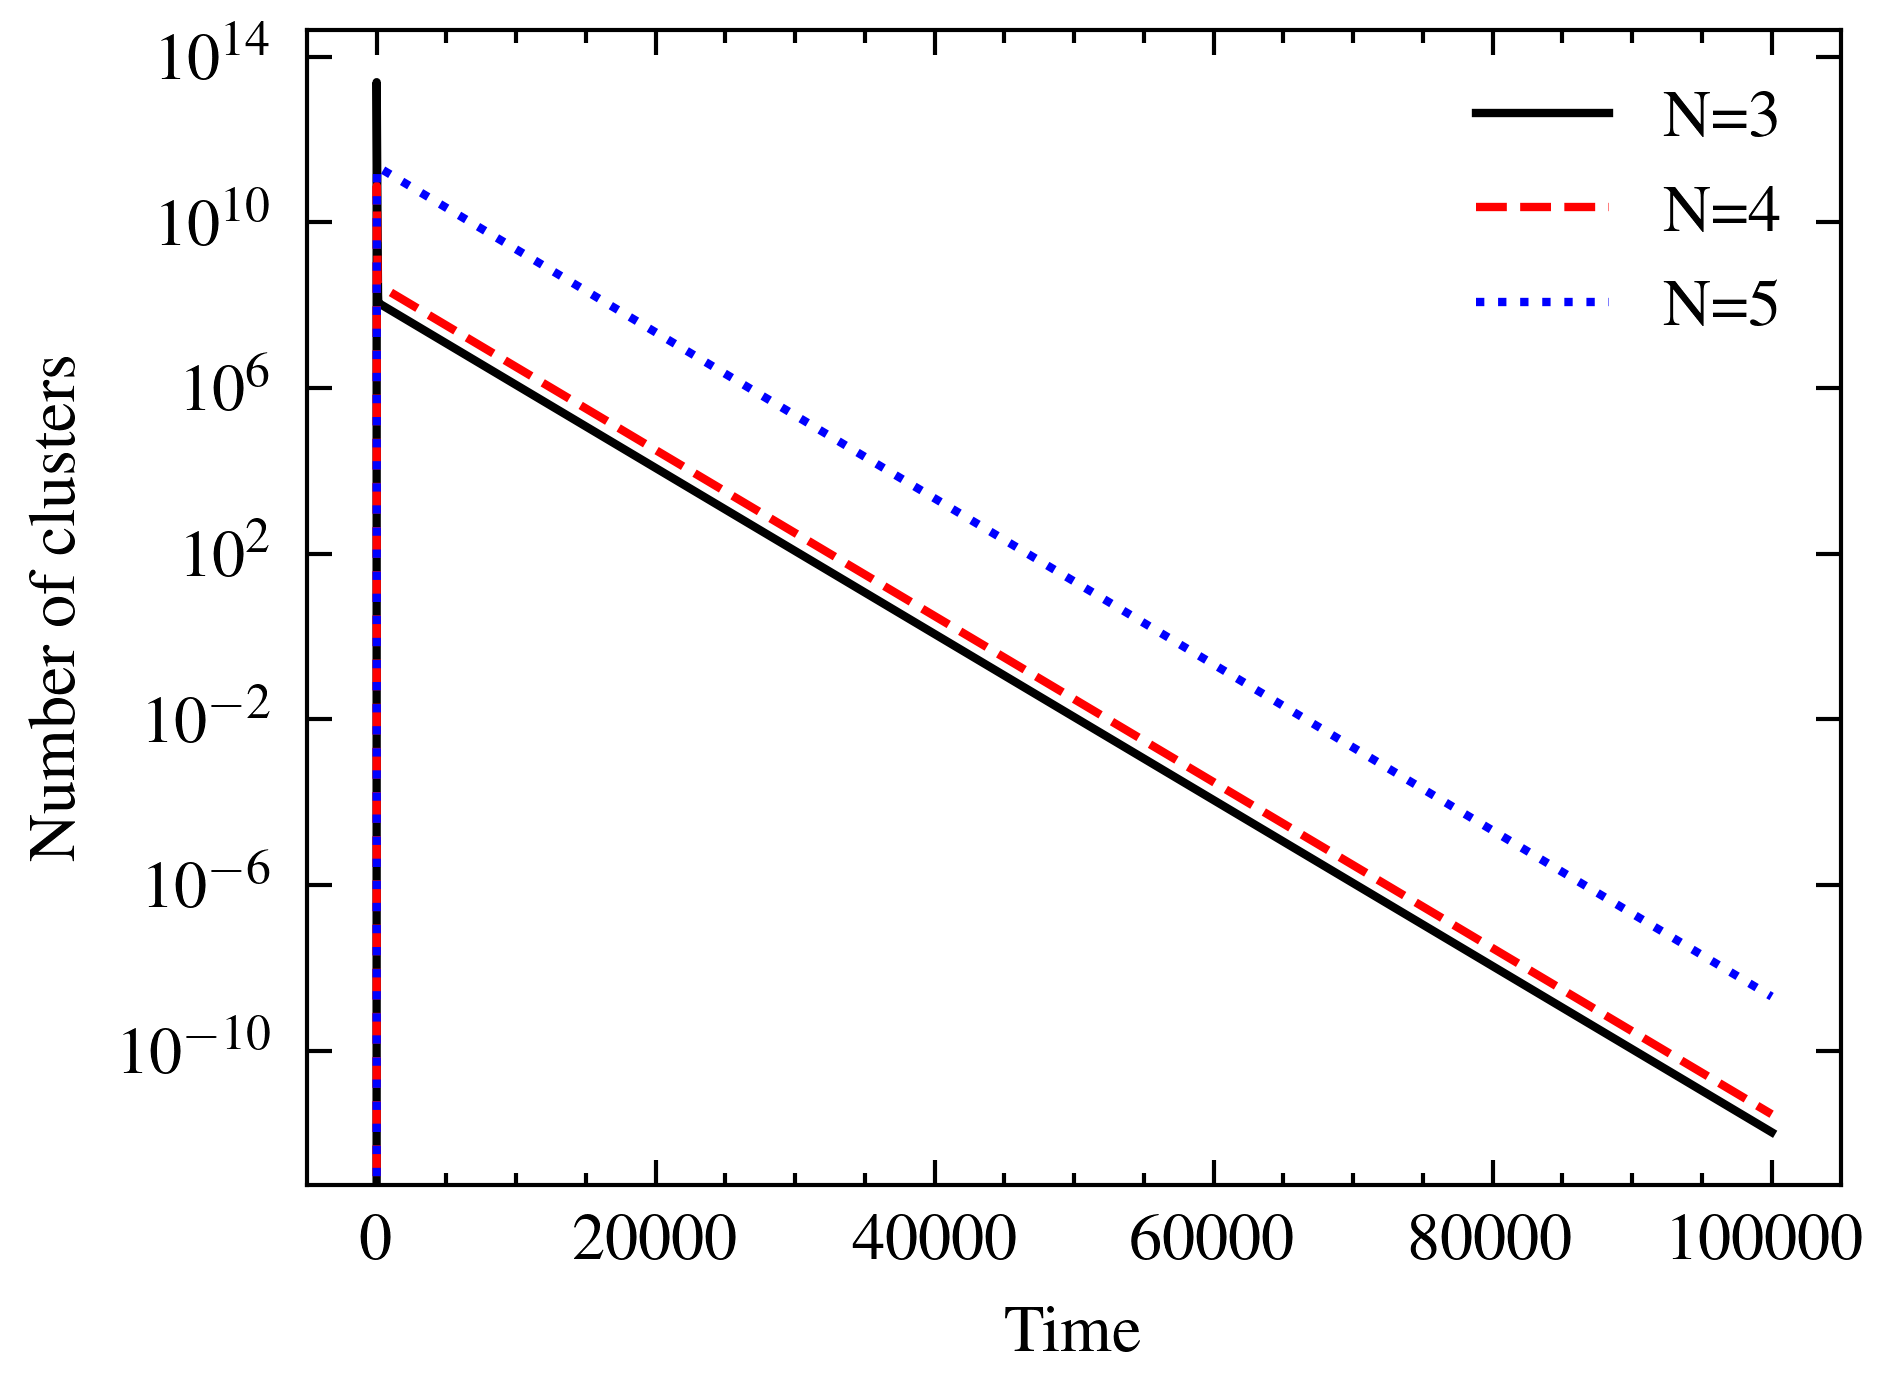

In [7]:
plt.figure()
plt.plot(sim.cluster_evolution[10,:], label = 'N=3')
plt.plot(sim.cluster_evolution[20,:], label = 'N=4')
plt.plot(sim.cluster_evolution[39,:], label = 'N=5')
#plt.plot(sim.cluster_evolution[99,:], label = 'N=6')
# plt.plot(sim.cluster_evolution[200,:], label = 'N=7')
# plt.plot(sim.cluster_evolution[500,:], label = 'N=8')
# plt.plot(sim.cluster_evolution[1000,:], label = 'N=9')
# plt.plot(sim.cluster_evolution[4000,:], label = 'N=10')

#plt.ylim(1e-20,1e18)
plt.legend()
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Number of clusters')
plt.show()

In [10]:
sim.rates_evolution

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03959208, 0.03959208, 0.03959208, ..., 0.03959208, 0.03959208,
        0.03959208],
       [0.00305076, 0.00305076, 0.00305076, ..., 0.00305076, 0.00305076,
        0.00305076],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
1-0.99999987

1.299999999870849e-07

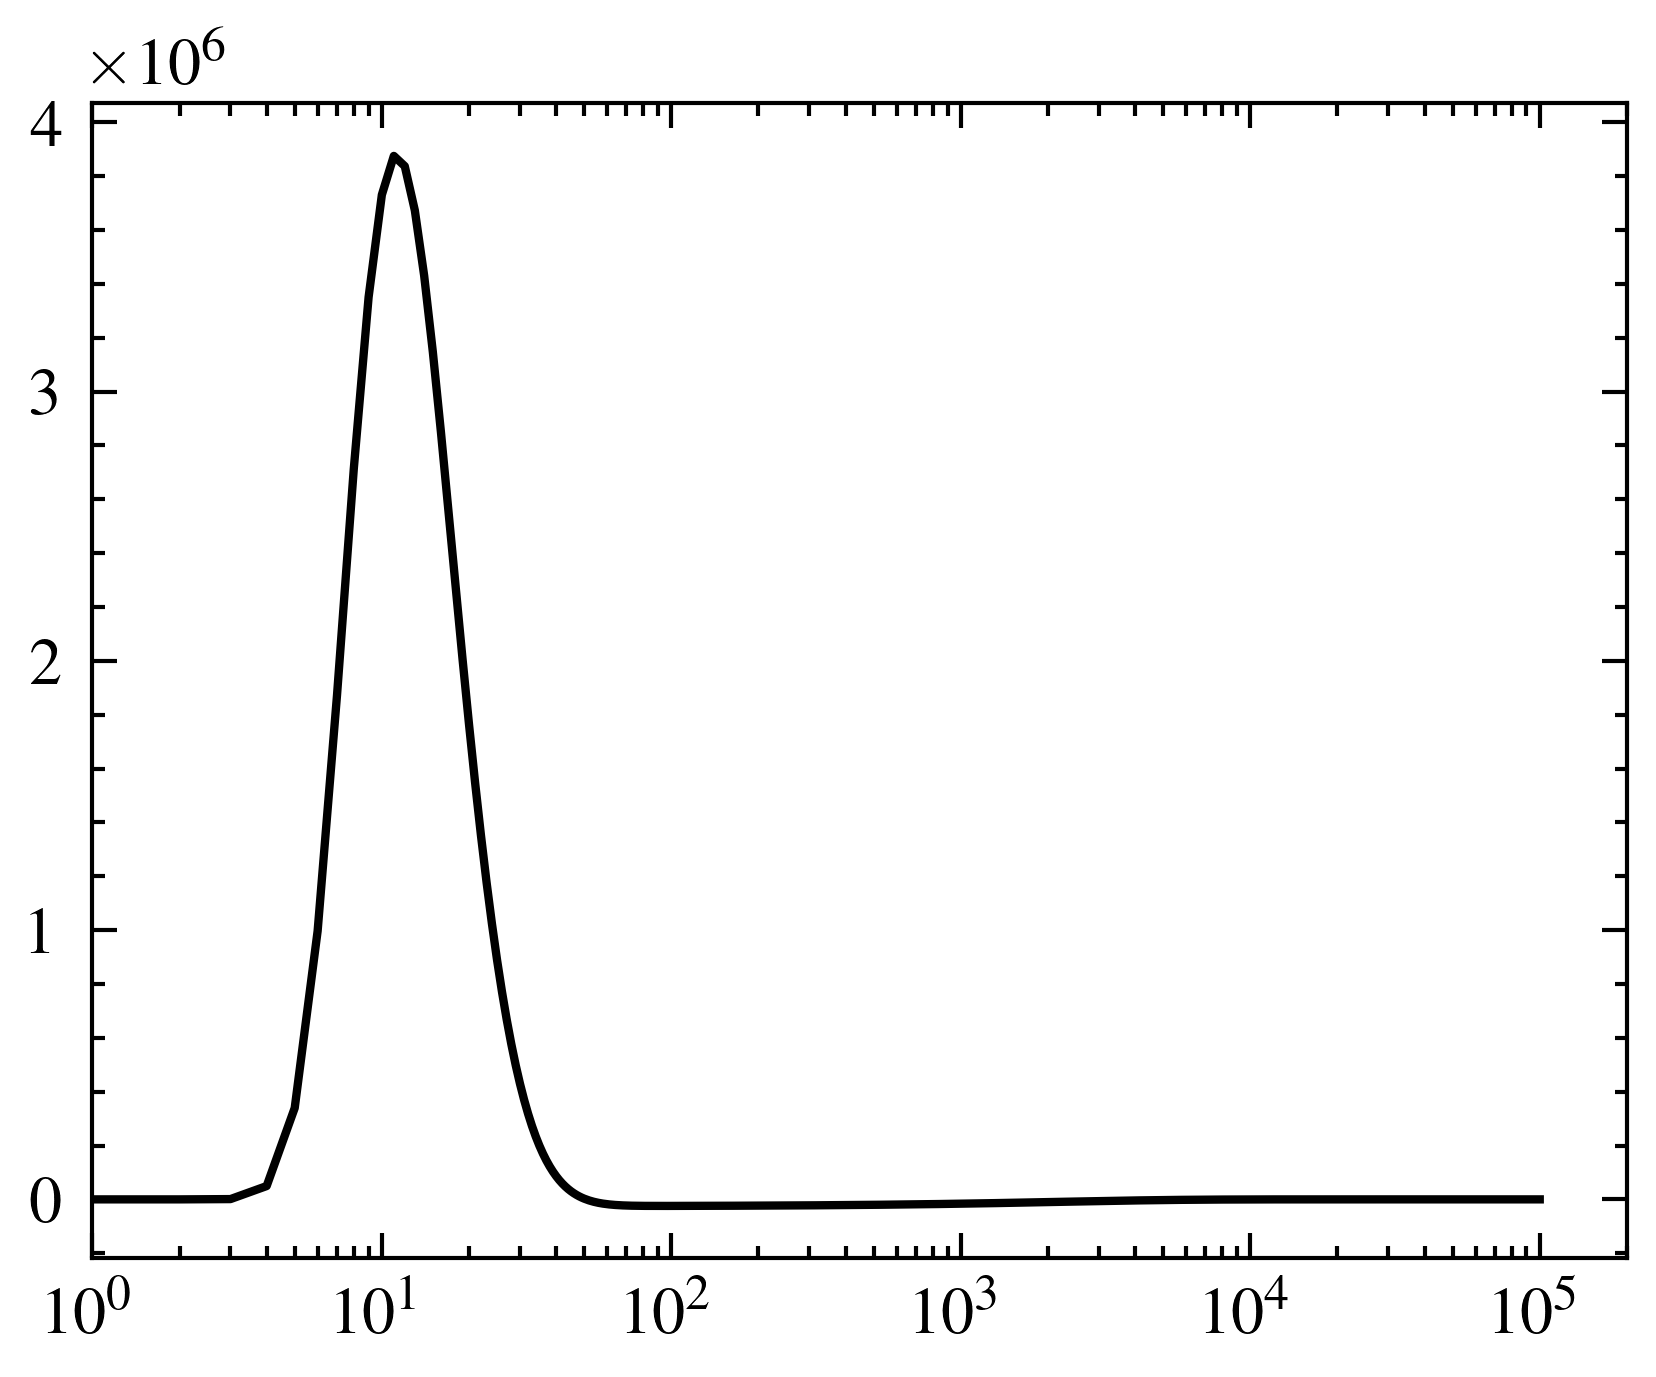

In [8]:
plt.figure()
t = np.linspace(0,ts*dt,ts)

#plt.plot(sim.rates_evolution.sum(axis=0))
plt.plot(1e-5*sim.rates_evolution[22:, :].sum(axis=0)/cluster_physics.unbiased_jump_rate.magnitude)
#plt.axhline(y = steady_state, color = 'green', linestyle = '--')
#plt.yscale('log')
plt.xlim(1,2e5)
plt.xscale('log')
#plt.yscale('log')
#plt.yscale('log')

(10, 1000000.0)

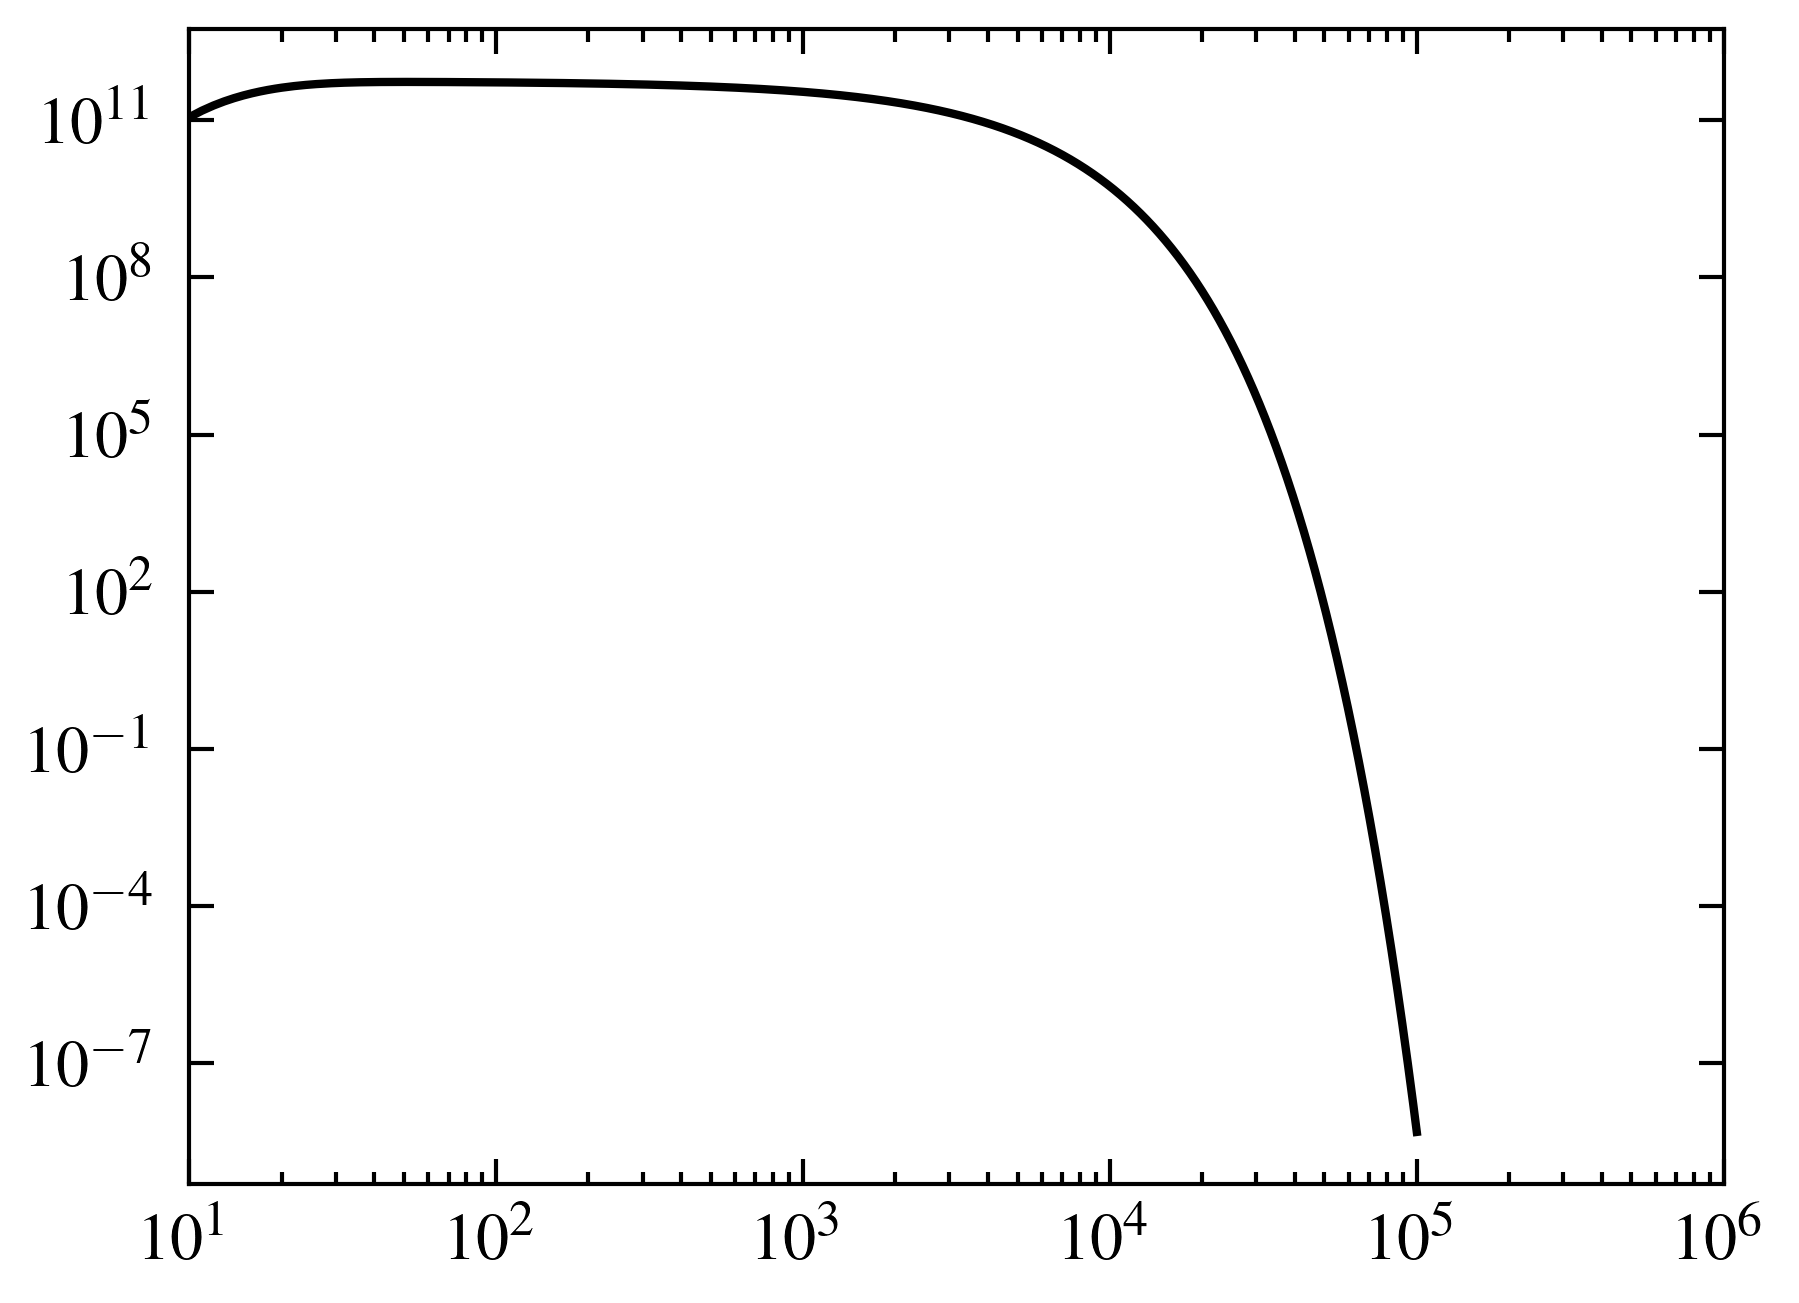

In [9]:
plt.figure()
t = np.linspace(0,ts*dt,ts)

#plt.plot(sim.rates_evolution.sum(axis=0))
plt.plot(sim.cluster_evolution[22:, :].sum(axis=0))
#plt.axhline(y = steady_state, color = 'green', linestyle = '--')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10,1e6)

#plt.yscale('log')
#plt.yscale('log')

In [21]:
suma_t = sim.rates_evolution.sum(axis=0)

# 'suma_t' es ahora un array con la suma de los valores para cada paso de tiempo
print(suma_t)

[4.18813201e-07 4.17085328e-07 4.15364769e-07 ... 7.69606577e-18
 7.69606581e-18 7.69606592e-18]


(1e-20, 1e+18)

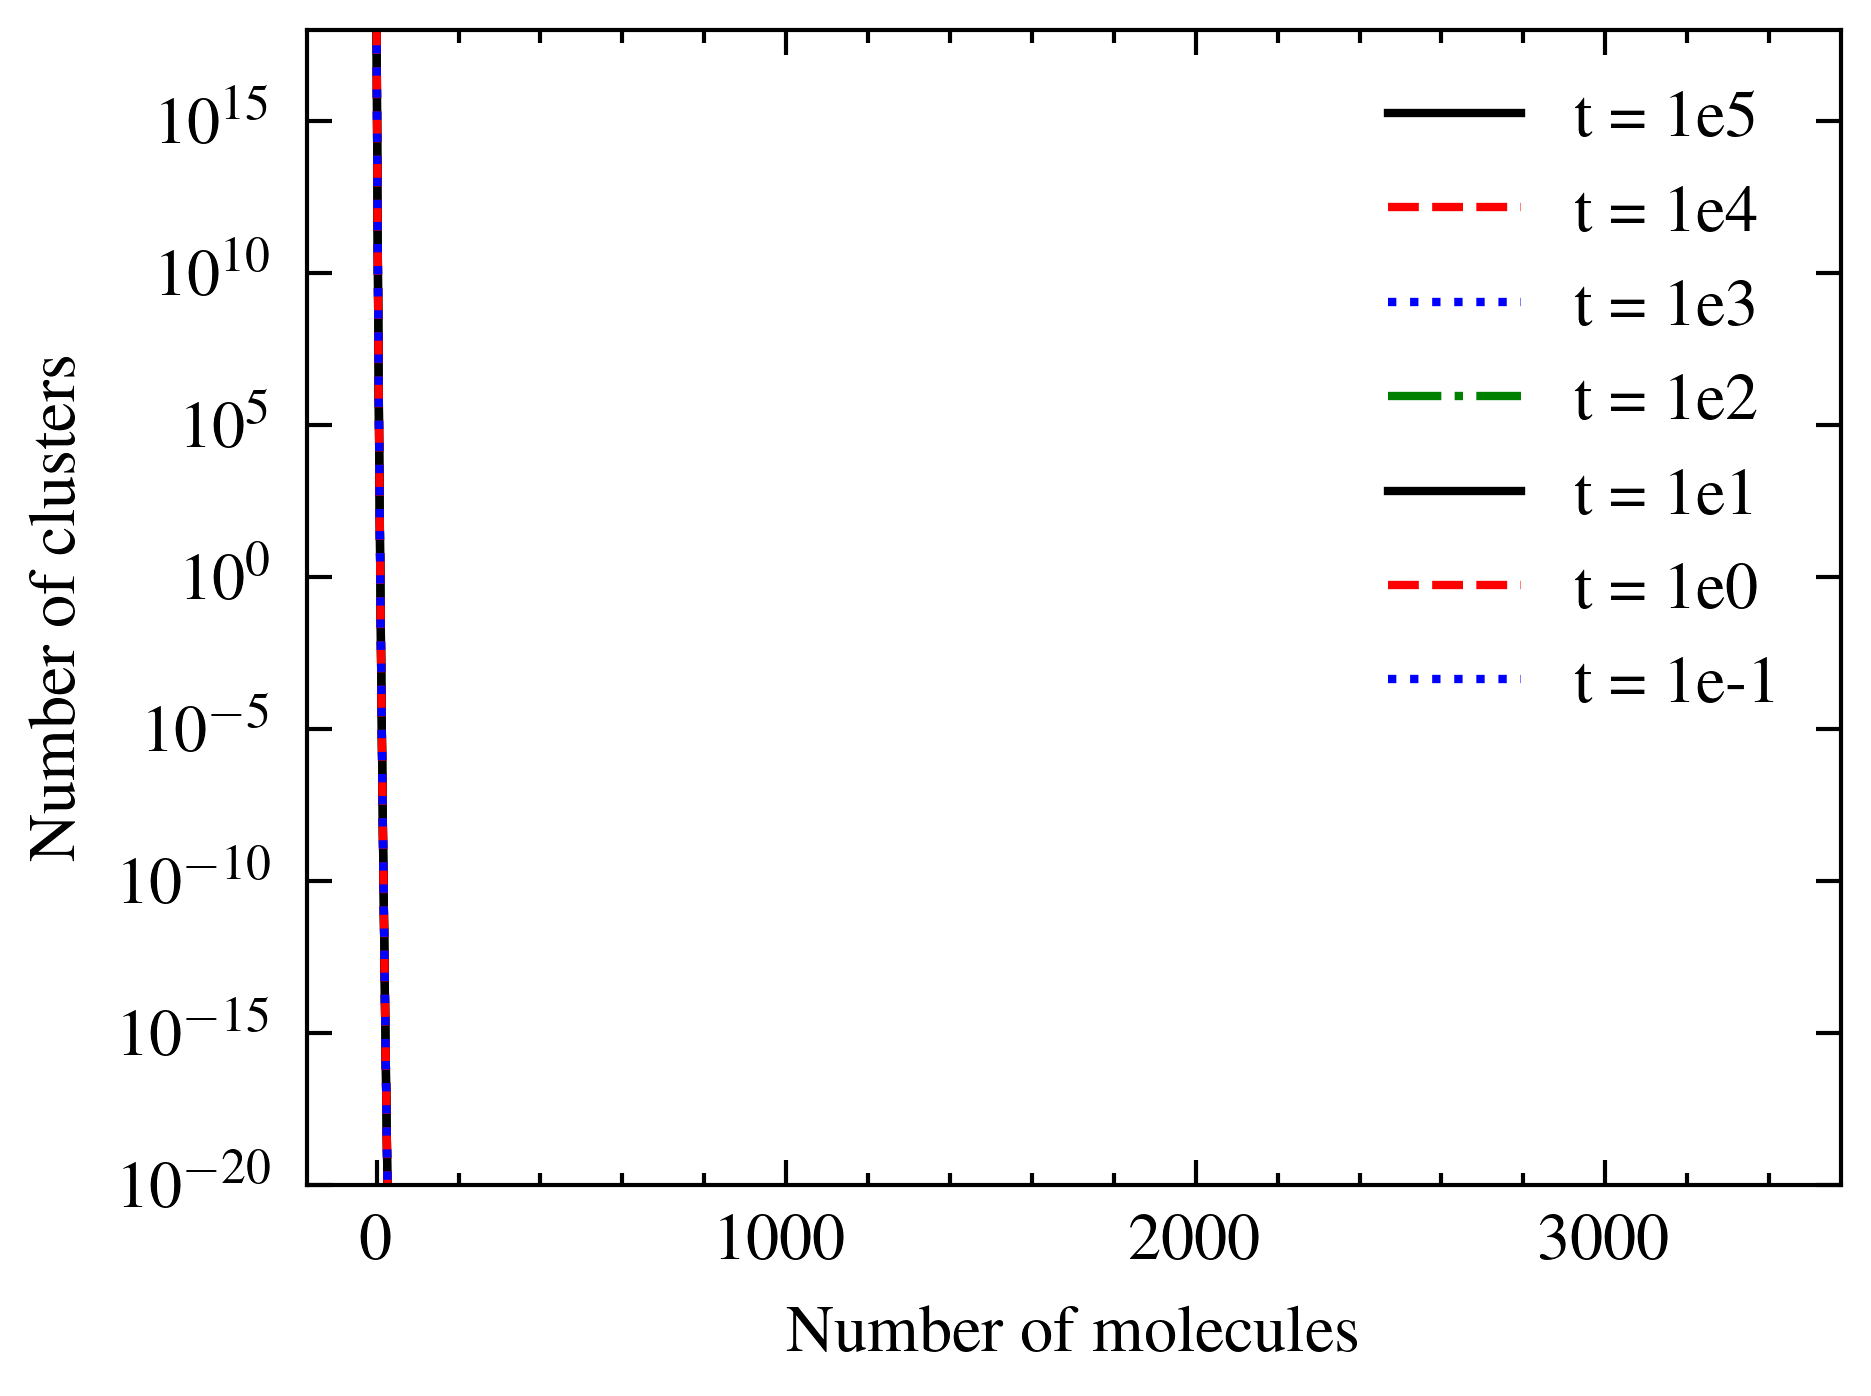

In [31]:
plt.plot(sim.cluster_evolution[:,-1], label = 't = 1e5')
plt.plot(sim.cluster_evolution[:,4], label = 't = 1e4')
plt.plot(sim.cluster_evolution[:,300], label = 't = 1e3')
plt.plot(sim.cluster_evolution[:,500], label = 't = 1e2')
plt.plot(sim.cluster_evolution[:,700], label = 't = 1e1')
plt.plot(sim.cluster_evolution[:,900], label = 't = 1e0')
plt.plot(sim.cluster_evolution[:,9990], label = 't = 1e-1')

plt.legend()
plt.yscale('log')
plt.xlabel('Number of molecules')
plt.ylabel('Number of clusters')
plt.ylim(1e-20,1e18)

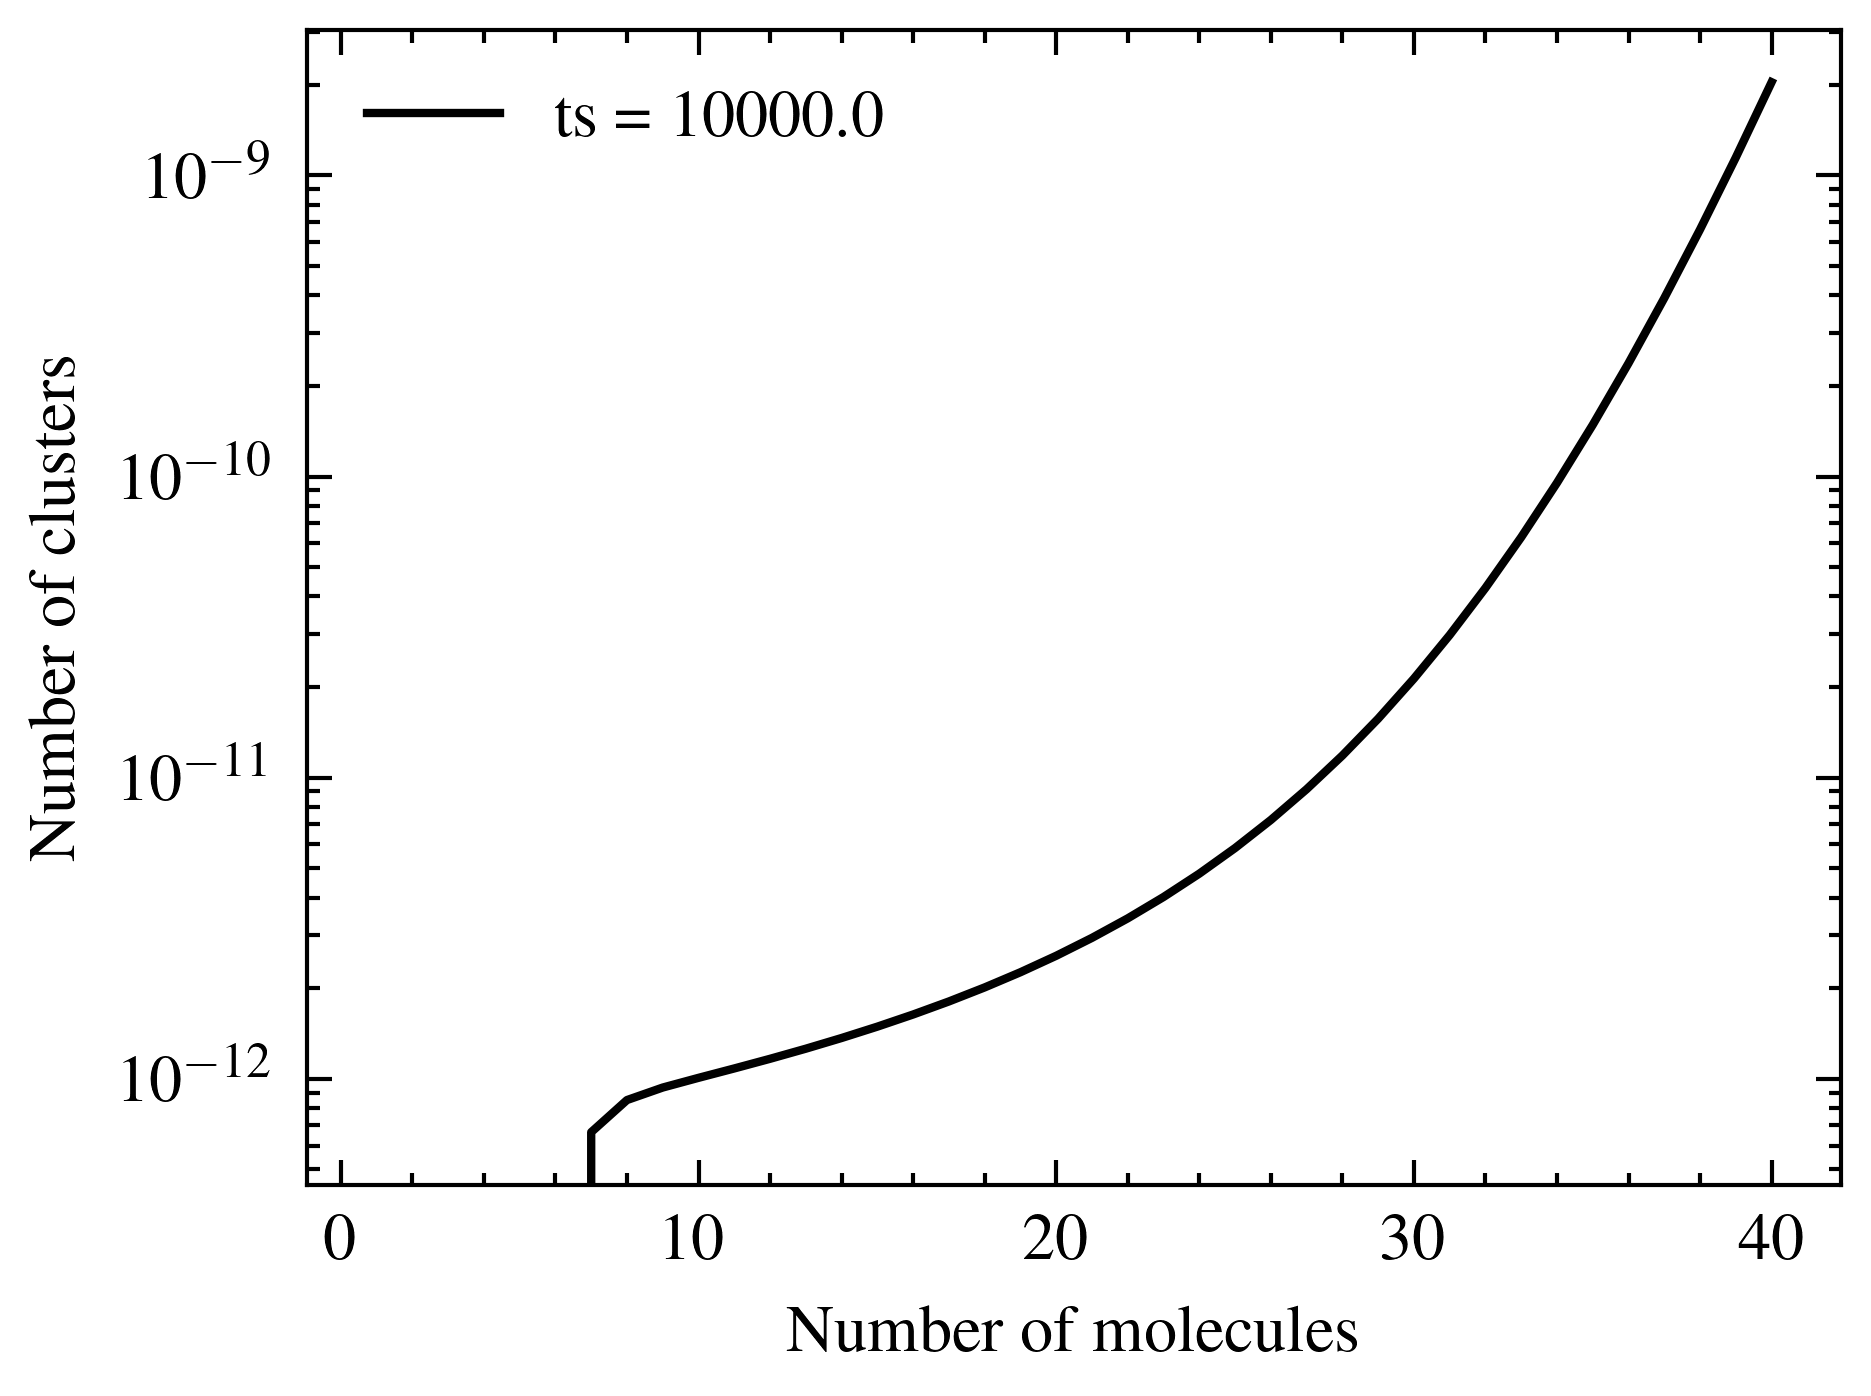

In [10]:
plt.figure()
n = np.linspace(1,500,500)
for i in range(len(time_step_array)):
    plt.plot(x_array[i],(y_array[i]), label = 'ts = '+str(time_step_array[i]*dt*cluster_physics.unbiased_jump_rate.magnitude))
#plt.plot(n,(cluster_physics.number_density_equilibrium(n).magnitude/cluster_physics.AVOGADRO.magnitude), label = 'Equilibrium')
plt.legend()
plt.xlabel('Number of molecules')
plt.ylabel('Number of clusters')

plt.yscale('log')
